# Pymaceuticals Inc.
Brett Claus Analysis

Capomulin and Ramicane have the lowest mean and median tumor volumes among all the regimens. This suggests that they tend to be more effective in reducing tumor size compared to other regimens.

Ketapril, Naftisol, Placebo, and Stelasyn have higher mean and median tumor volumes, indicating that they are less effective in reducing tumor size.

Infubinol is the only regimen that has outliers. The potential outlier has a tumor volume of 36.32 which may skew data. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview

mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [128]:
# Checking the number of mice.
mouses = len(mouse_study_df['Mouse ID'].unique())
mouses

249

In [84]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dupmouse= duplicates["Mouse ID"].unique()
dupmouse

array(['g989'], dtype=object)

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedups=mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicates['Mouse ID'])]
mousedups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df= mouse_study_df[~mouse_study_df['Mouse ID'].isin(dupmouse)]
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [87]:
# Checking the number of mice in the clean DataFrame.
mice=len(mouse_study_df["Mouse ID"].unique())
mice

248

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meantumor= mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
medtumor= mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
vartumor= mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdtumor= mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
semtumor= mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": meantumor,
    "Median Tumor Volume": medtumor,
    "Tumor Volume Variance": vartumor,
    "Tumor Volume Std. Dev.": stdtumor,
    "Tumor Volume SEM": semtumor
})

summary_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

summary_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

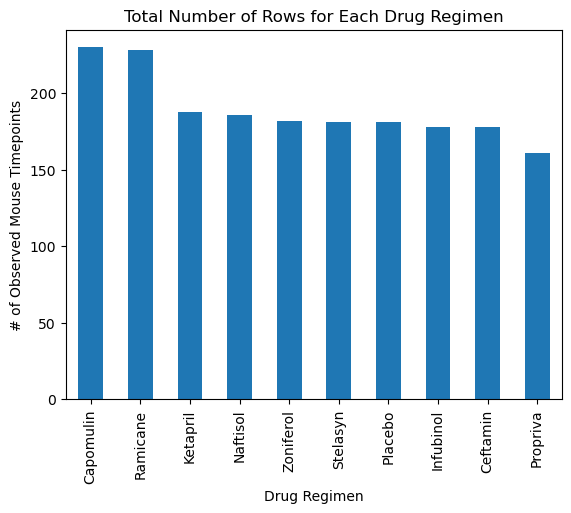

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_study_df["Drug Regimen"].value_counts()

# Create a bar plot
regimen_counts.plot(kind="bar")

# Set plot labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

# Show the plot
plt.show()

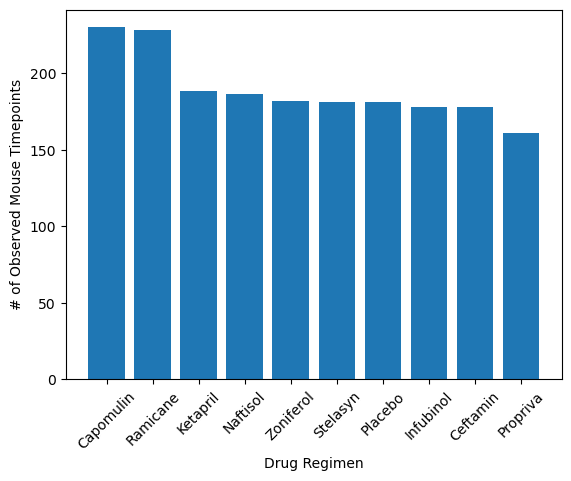

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = mouse_study_df["Drug Regimen"].value_counts()
regimen_names = regimen_counts.index
row_counts = regimen_counts.values

# Create a bar plot

plt.bar(regimen_names, row_counts)

# Set plot labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

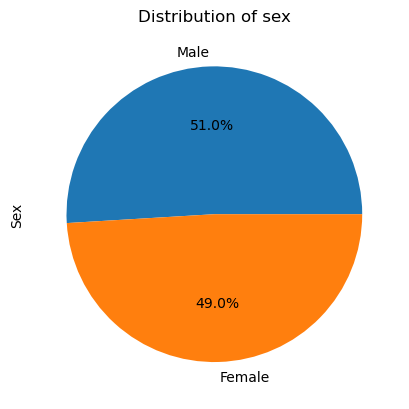

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts= mouse_study_df["Sex"].value_counts()

sex_counts.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Distribution of sex")

plt.show
                

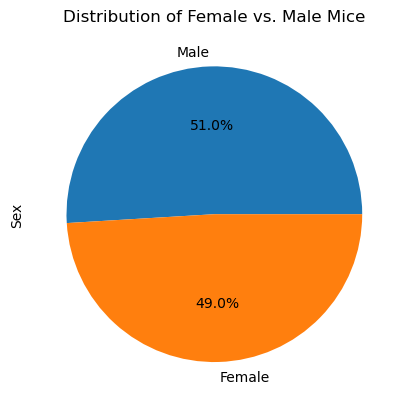

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Extract the counts for each sex (female and male)
sex_counts = mouse_study_df["Sex"].value_counts()
labels = sex_counts.index
counts = sex_counts.values

# Create a pie plot
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=0)

# Set plot title
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("Sex")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

specified_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the original DataFrame to include only the specified treatment regimens
specified_treatments_df = mouse_study_df[mouse_study_df["Drug Regimen"].isin(specified_regimens)]

# Group the data by "Mouse ID" and find the last timepoint for each mouse
last_timepoint_df = specified_treatments_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, specified_treatments_df, on=["Mouse ID", "Timepoint"])



In [95]:
# Put treatments into a list for for loop (and later for plot labels)
specified_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Loop through each treatment regimen
    
for regimen in specified_regimens:
    # Filter the final_tumor_volume_df DataFrame for the current regimen
    regimen_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]

    # Append the tumor volume data for the current regimen to the list
    tumor_volume_data.append(regimen_data)

    # Calculate the quartiles and IQR for the current regimen
    quartiles = regimen_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    potential_outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    if not potential_outliers.empty:
        print(f"{regimen}'s potential outliers: {potential_outliers}")
    else:
        print(f"{regimen} has no potential outliers")



Capomulin has no potential outliers
Ramicane has no potential outliers
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has no potential outliers


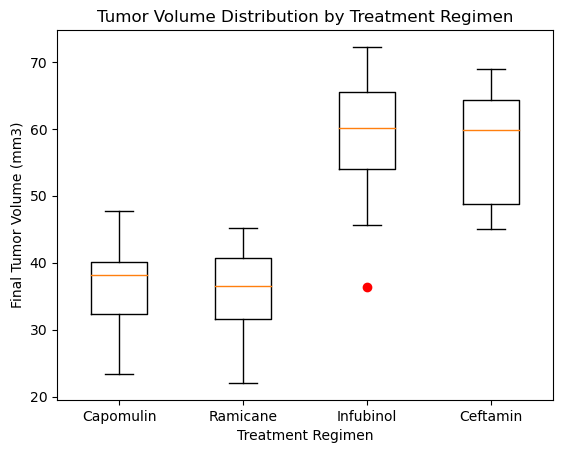

In [111]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = tumor_volume_data

# Create a list of labels for the box plot
labels = specified_regimens

# Create the box plot
plt.boxplot(data, labels=labels,sym='ro') 

# Set labels and title
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume Distribution by Treatment Regimen")

# Show the box plot
plt.show()

## Line and Scatter Plots

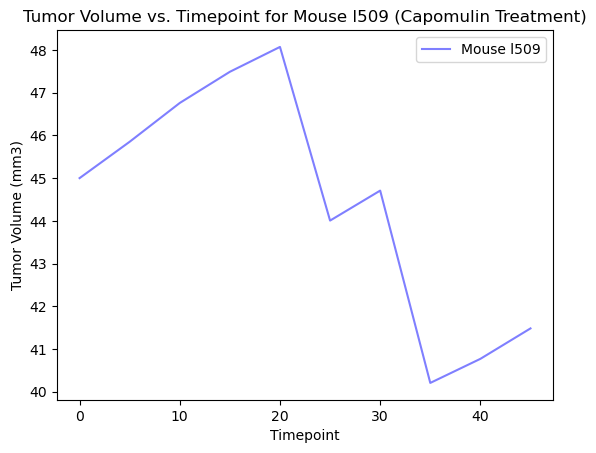

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"

# Filter the DataFrame to include only the selected mouse and Capomulin treatment
capomulin_data = mouse_study_df[(mouse_study_df["Mouse ID"] == mouse_id) & (mouse_study_df["Drug Regimen"] == "Capomulin")]

# Create a line plot
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], color='b',alpha=0.5, label=f"Mouse {mouse_id}")

# Set plot labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin Treatment)")

# Show legend
plt.legend()

# Show the plot
plt.show()

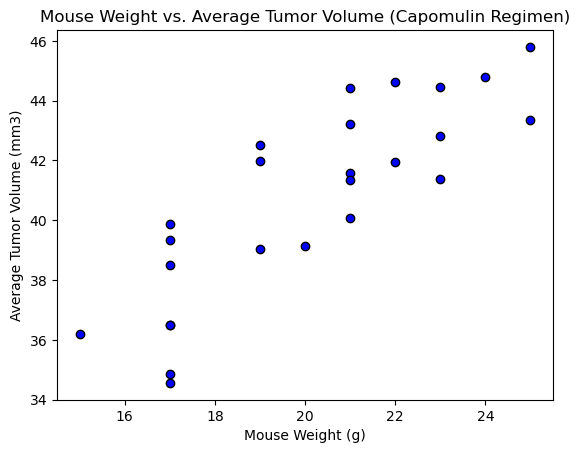

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only the Capomulin regimen
capomulin_data = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume and mouse weight
grouped_data = capomulin_data.groupby("Mouse ID").agg(
    Average_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Mouse_Weight=("Weight (g)", "mean")
).reset_index()

# Create a scatter plot
plt.scatter(grouped_data["Mouse_Weight"], grouped_data["Average_Tumor_Volume"], marker='o', facecolors='b', edgecolors='k')

# Set plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Show the plot

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


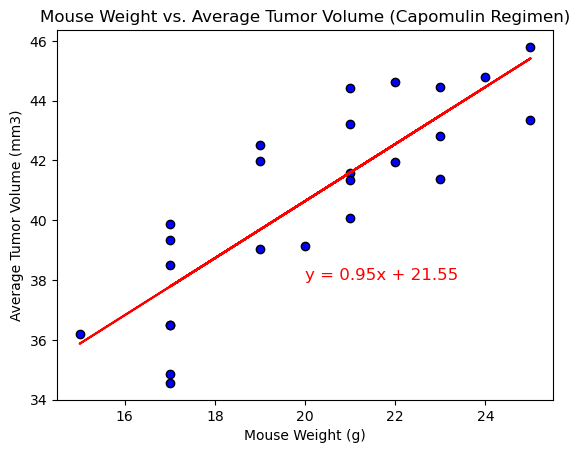

In [114]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only the Capomulin regimen
from scipy.stats import linregress
capomulin_data = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume and mouse weight
grouped_data = capomulin_data.groupby("Mouse ID").agg(
    Average_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Mouse_Weight=("Weight (g)", "mean")
).reset_index()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = st.pearsonr(grouped_data["Mouse_Weight"], grouped_data["Average_Tumor_Volume"])
print(f"Correlation Coefficient: {correlation_coefficient[0]}")

# Perform linear regression to get the slope, intercept, and r-value
slope, intercept, r_value, p_value, std_err = linregress(grouped_data["Mouse_Weight"], grouped_data["Average_Tumor_Volume"])

# Calculate the regression values
regress_values = grouped_data["Mouse_Weight"] * slope + intercept

# Create a linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create a scatter plot with the regression line
plt.scatter(grouped_data["Mouse_Weight"], grouped_data["Average_Tumor_Volume"], marker='o', facecolors='b', edgecolors='k')
plt.plot(grouped_data["Mouse_Weight"], regress_values, "r-")

# Set plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (20, 38), fontsize=12, color="red")

# Show the plot
plt.show()